In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [42]:
df = pd.read_csv('fetal_health.csv')
df.head() # display first 5 rows

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [43]:
# to check if there are any column that is missing data
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [44]:
# We are separating the data into 2 forms, x (w/o fetal health) is
# for the model to train and y (only fetal) be what the model would try to predict
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Standardize (standardize, so mean of 0) and x-scaled scales 'X"
# this will clean the data for the models to go crazy and predict fetal health
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1) # Combine
display(processed_df.head())

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980,2.0
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526,1.0
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526,1.0
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980,1.0
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980,1.0


In [27]:
# drop unwanted histogram columns
columns_to_drop = ['histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
processed_df = processed_df.drop(columns=columns_to_drop)
display(processed_df.head())

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,fetal_health
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-0.165507,2.0
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.529124,1.0
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.529124,1.0
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,1.195333,1.0
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,1.0


Accuracy: 0.9343
Macro-F1 Score: 0.8678


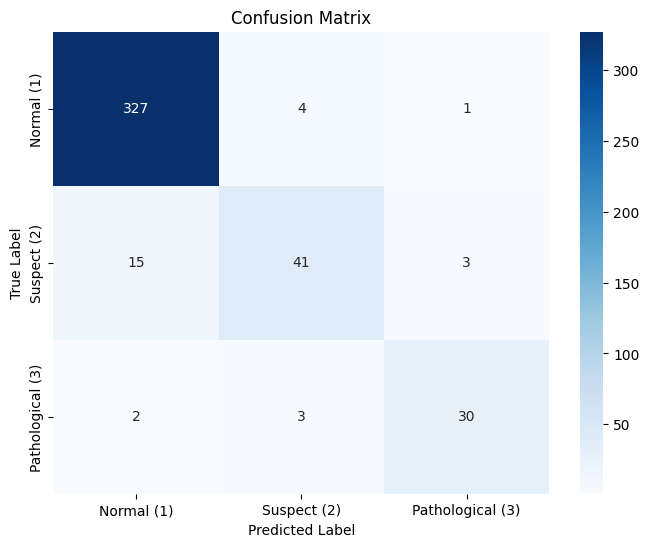

In [30]:
# Now we do the modeling w/ randomforest
X_final = processed_df.drop('fetal_health', axis=1)
y_final = processed_df['fetal_health']
# Split the data into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train) # starts traning
y_pred = rf_classifier.predict(X_test) # starts predicitng based on the trained model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro-F1 Score: {macro_f1:.4f}")

# confusion matrix is based on 3x3 to figure out how accurate it was at predicting fetal health,
# there are 3 classifications on Normal, Suspect, Pathological
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'],
            yticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

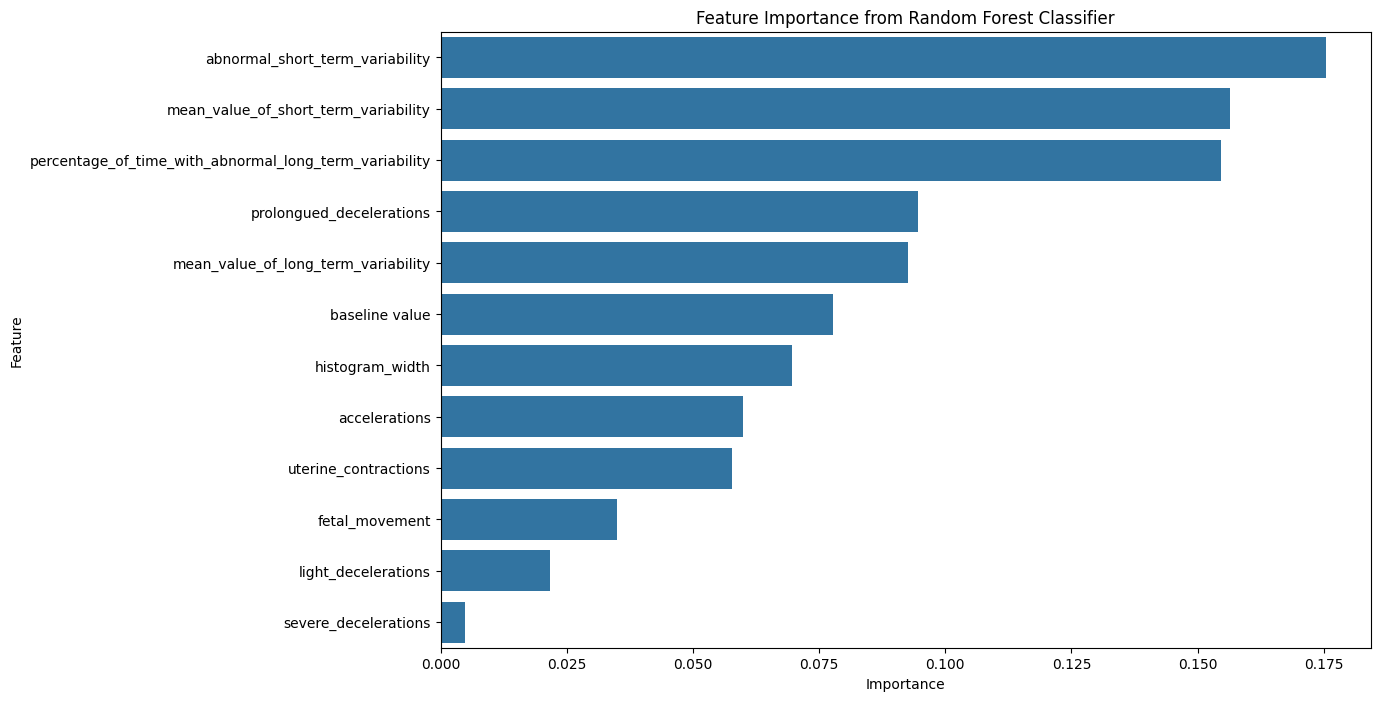

In [31]:
feature_importances = rf_classifier.feature_importances_
features = X_final.columns
#creates a graph
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Logistic Regression Accuracy: 0.8665
Logistic Regression Macro-F1 Score: 0.7319


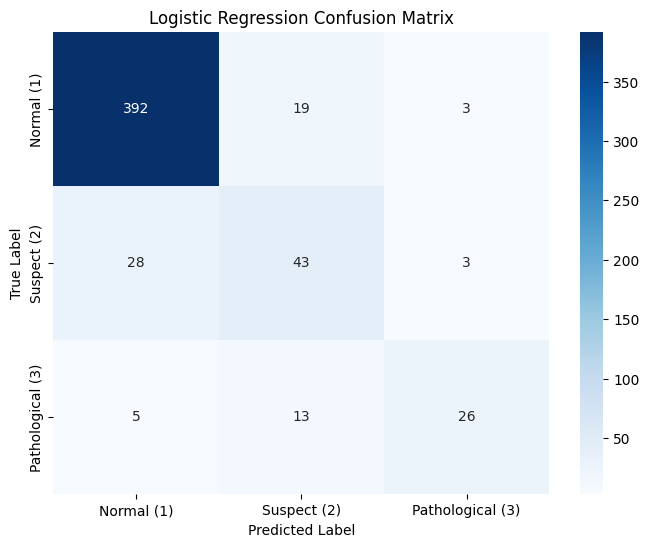

In [32]:
# now we do logistic regression with a 75-25 split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_final, y_final, test_size=0.25, random_state=42, stratify=y_final)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_classifier.predict(X_test_lr)

accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)
macro_f1_lr = f1_score(y_test_lr, y_pred_lr, average='macro')
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Macro-F1 Score: {macro_f1_lr:.4f}")


# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'],
            yticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

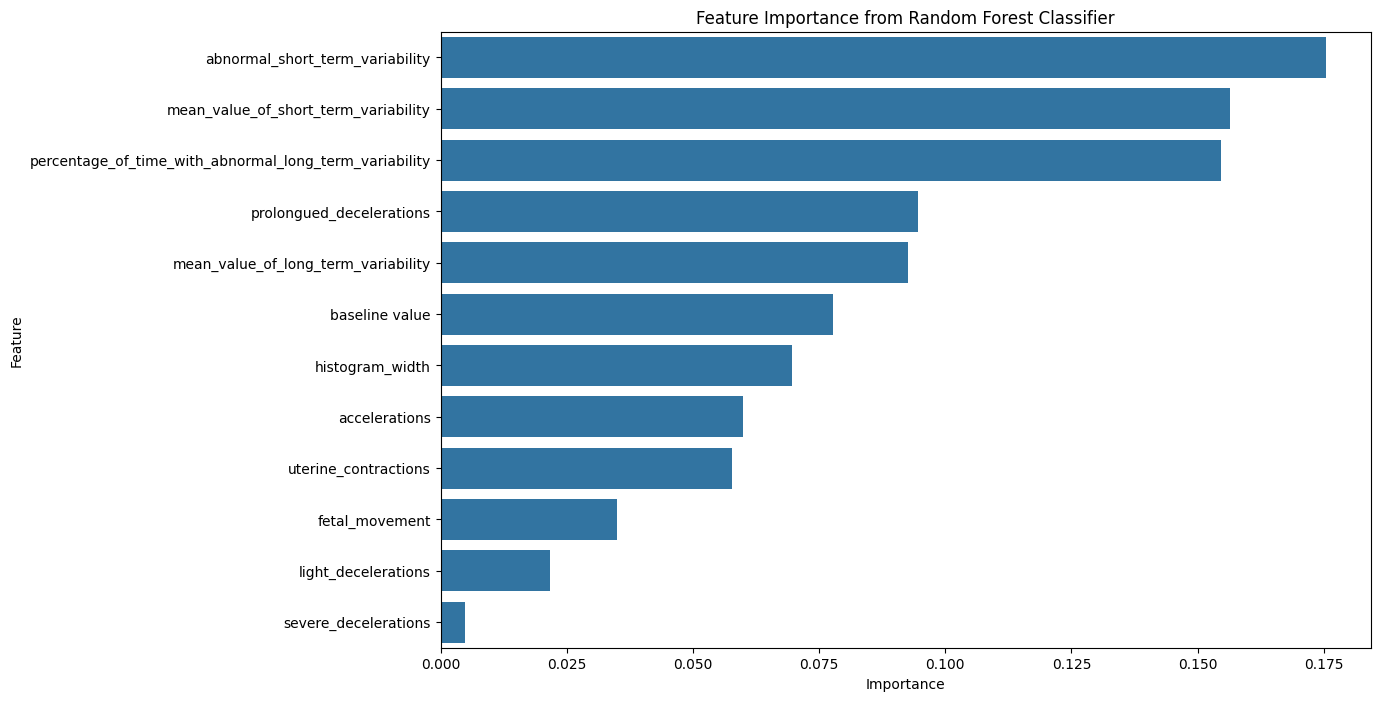

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

KNN Accuracy: 0.8910
KNN Macro-F1 Score: 0.7867


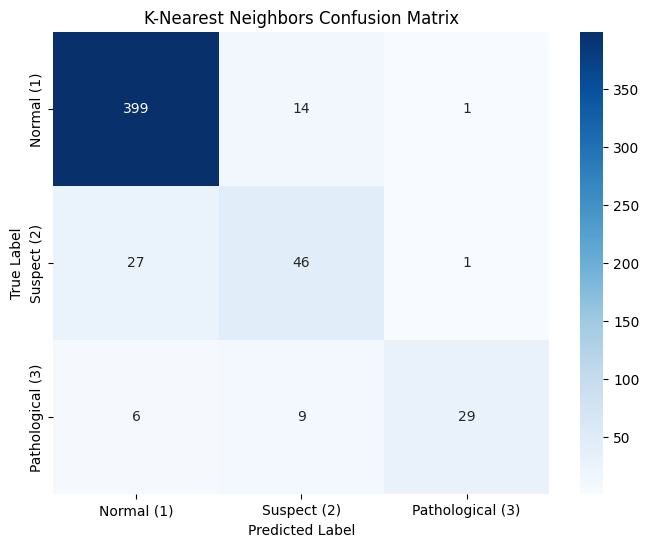

In [34]:
# NOw KNN with k = 5 with the same split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_final, y_final, test_size=0.25, random_state=42, stratify=y_final)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_knn, y_train_knn)
y_pred_knn = knn_classifier.predict(X_test_knn)
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)
macro_f1_knn = f1_score(y_test_knn, y_pred_knn, average='macro')
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Macro-F1 Score: {macro_f1_knn:.4f}")

# matri
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'],
            yticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

In [35]:
# comparison with the 3 models
model_accuracies = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy, accuracy_lr, accuracy_knn]
})

model_accuracies = model_accuracies.sort_values(by='Accuracy', ascending=False)
print("Model Accuracy Comparison:")
display(model_accuracies)

Model Accuracy Comparison:


,Model,Accuracy
0,Random Forest,0.934272
2,K-Nearest Neighbors,0.890977
1,Logistic Regression,0.866541


In [45]:
# now change the parameter of knn to see what the outcomes could be
# k = 3
knn_classifier_3 = KNeighborsClassifier(n_neighbors=3)
knn_classifier_3.fit(X_train_knn, y_train_knn)
y_pred_knn_3 = knn_classifier_3.predict(X_test_knn)

accuracy_knn_3 = accuracy_score(y_test_knn, y_pred_knn_3)
macro_f1_knn_3 = f1_score(y_test_knn, y_pred_knn_3, average='macro')
print(f"KNN (n=3) Accuracy: {accuracy_knn_3:.4f}")
print(f"KNN (n=3) Macro-F1 Score: {macro_f1_knn_3:.4f}")

KNN (n=3) Accuracy: 0.9041
KNN (n=3) Macro-F1 Score: 0.8093


In [37]:
#k = 2
knn_classifier_2 = KNeighborsClassifier(n_neighbors=2)
knn_classifier_2.fit(X_train_knn, y_train_knn)
y_pred_knn_2 = knn_classifier_2.predict(X_test_knn)

accuracy_knn_2 = accuracy_score(y_test_knn, y_pred_knn_2)
macro_f1_knn_2 = f1_score(y_test_knn, y_pred_knn_2, average='macro')
print(f"KNN (n=2) Accuracy: {accuracy_knn_2:.4f}")
print(f"KNN (n=2) Macro-F1 Score: {macro_f1_knn_2:.4f}")

KNN (n=2) Accuracy: 0.8929
KNN (n=2) Macro-F1 Score: 0.7795


In [38]:
# k = 4
knn_classifier_4 = KNeighborsClassifier(n_neighbors=4)
knn_classifier_4.fit(X_train_knn, y_train_knn)
y_pred_knn_4 = knn_classifier_4.predict(X_test_knn)

accuracy_knn_4 = accuracy_score(y_test_knn, y_pred_knn_4)
macro_f1_knn_4 = f1_score(y_test_knn, y_pred_knn_4, average='macro')
print(f"KNN (n=4) Accuracy: {accuracy_knn_4:.4f}")
print(f"KNN (n=4) Macro-F1 Score: {macro_f1_knn_4:.4f}")

KNN (n=4) Accuracy: 0.8947
KNN (n=4) Macro-F1 Score: 0.7714


In [39]:
# Now we compare the previous models wih the new knn models
model_accuracies = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors:5', 'K-Nearest Neighbors:2', 'K-Nearest Neighbors:3', 'K-Nearest Neighbors:4' ],
    'Accuracy': [accuracy, accuracy_lr, accuracy_knn, accuracy_knn_2, accuracy_knn_3, accuracy_knn_4]
})
model_accuracies = model_accuracies.sort_values(by='Accuracy', ascending=False)
print("Model Accuracy Comparison:")
display(model_accuracies)

Model Accuracy Comparison:


,Model,Accuracy
0,Random Forest,0.934272
4,K-Nearest Neighbors:3,0.904135
5,K-Nearest Neighbors:4,0.894737
3,K-Nearest Neighbors:2,0.892857
2,K-Nearest Neighbors:5,0.890977
1,Logistic Regression,0.866541
